In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

plt.rcParams['figure.figsize'] = (10, 6.5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 3

In [2]:
with open('./lists/parsed.json', 'r') as f:
    download_list = json.load(f)

In [4]:
tabs = pd.DataFrame.from_records(download_list)

In [5]:
tabs

,filename,title,key,genre,style,tuning,difficulty,link,search_str,search_html
0,./data/http_cache/10.html,J'attendrai,C,Jazz,Bluegrass (Scruggs),Standard Open G (gDGBD),Expert,https://www.hangoutstorage.com/banjohangout.or...,J'attendraiGenre: Jazz Style: Bluegrass (Scru...,"<div class=""row zebra rowPadded""> <div class=""..."
1,./data/http_cache/10.html,J&W Rag,C,Bluegrass,Unknown/None Chosen,Standard Open G (gDGBD),Intermediate,https://www.hangoutstorage.com/banjohangout.or...,J&W RagGenre: Bluegrass Style: Unknown/None C...,"<div class=""row zebra rowPadded""> <div class=""..."
2,./data/http_cache/10.html,J.S. Bach Cello Suite 1 Allemande,G,Classical,Classical,Standard Open G (gDGBD),Expert,error,J.S. Bach Cello Suite 1 AllemandeGenre: Classi...,"<div class=""row zebra rowPadded""> <div class=""..."
3,./data/http_cache/10.html,Jack of the Wood (Jens Kruger),C,Bluegrass,Bluegrass (Scruggs),Double C (gCGCD),Expert,https://www.hangoutstorage.com/banjohangout.or...,Jack of the Wood (Jens Kruger)Genre: Bluegrass...,"<div class=""row zebra rowPadded""> <div class=""..."
4,./data/http_cache/10.html,Jack's the Lad (Sailors Hornpipe),G,Bluegrass,Bluegrass (Scruggs),Standard Open G (gDGBD),Intermediate,error,Jack's the Lad (Sailors Hornpipe)Genre: Bluegr...,"<div class=""row zebra rowPadded""> <div class=""..."
...,...,...,...,...,...,...,...,...,...,...
4606,./data/http_cache/23.html,Quadrill,error,Old Time,Clawhammer and Old-Time,error,error,error,QuadrillGenre: Old Time Style: Clawhammer and...,"<div class=""row zebra rowPadded""> <div class=""..."
4607,./data/http_cache/23.html,Quadrille (Canadian ?),error,Old Time,Clawhammer and Old-Time,error,error,error,Quadrille (Canadian ?)Genre: Old Time Style: ...,"<div class=""row zebra rowPadded""> <div class=""..."
4608,./data/http_cache/23.html,Quince Dillon's High D,D,Old Time,Clawhammer and Old-Time,Drop C (gCGBD),Intermediate,https://www.hangoutstorage.com/banjohangout.or...,Quince Dillon's High DGenre: Old Time Style: ...,"<div class=""row zebra rowPadded""> <div class=""..."
4609,./data/http_cache/23.html,Quince Dillon's High D Tune,"D Difficulty: IntermediatePosted by carlb, up...",Old Time,Clawhammer and Old-Time,error,Intermediate,error,Quince Dillon's High D TuneGenre: Old Time St...,"<div class=""row zebra rowPadded""> <div class=""..."


In [6]:
tabs['tuning'].unique()
# results = []
# for search in tabs.search_str.values:
#     try:
#         results.append(re.search("Genre: ([^yY]*)Style", search).group(1).strip())
#     except:
#         results.append('error')
# set(results)

array(['Standard Open G (gDGBD)', 'Double C (gCGCD)', 'error', 'aDGBD',
       'Sawmill (gDGCD)', 'Tenor G (DGdg)', 'Tenor Standard (CGDA)',
       'Open Gm (gDGBbD)', 'Drop C (gCGBD)', 'Dm (aDFAD)',
       'Open D (aDF#Ad)', 'Open D (f#DF#Ad)', 'Tenor Irish (GDAE)',
       'Open C (gCGCE)', 'Chicago (DGBE)', 'Plectrum Standard (CGBD)',
       'Cm (gCGCEb)', 'Tenor C (CGdg)'], dtype=object)

In [7]:
tabs['title_length'] = tabs.title.apply(lambda x: len(x))

<AxesSubplot:>

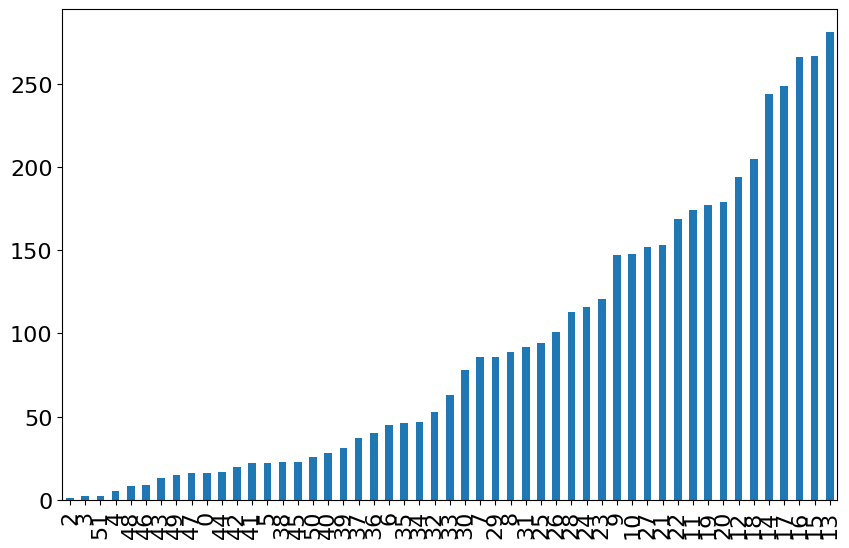

In [8]:
tabs.title_length.value_counts().sort_values().plot.bar()

In [9]:
tabs[tabs['title_length'] > 40]['title']

24           Jaw Bone (Pope's Arkasas Mountaineers, 1928)
25             Jawbones (Jordan Am A Hard Road To Travel)
51          Jerusalem Ridge - K. Baker / banjo solo in Em
52              Jerusalem Ridge - K. Baker + banjo backup
73      Jesu, Joy of Man's Desiring,By Pete Seeger him...
                              ...                        
4488      Why Don't You Tell Me So, as played by JD Crowe
4506        Wild Mountain Thyme (Will ye go, lassie, go?)
4521            Wildwood Flower - gEADE tuning clawhammer
4524            Wildwood Flower (In G with jazzy changes)
4605          Wrecking Ball - Mother Mother (Banjo Intro)
Name: title, Length: 171, dtype: object

In [10]:
tabs['link']

0       https://www.hangoutstorage.com/banjohangout.or...
1       https://www.hangoutstorage.com/banjohangout.or...
2                                                   error
3       https://www.hangoutstorage.com/banjohangout.or...
4                                                   error
                              ...                        
4606                                                error
4607                                                error
4608    https://www.hangoutstorage.com/banjohangout.or...
4609                                                error
4610    https://www.hangoutstorage.com/banjohangout.or...
Name: link, Length: 4611, dtype: object

In [11]:
# Come up with a good file-name

tabs['filename'] = tabs['title'].apply(lambda x: '_'.join((x.lower().replace('?','').replace('(', ' ').replace(')', ' ').strip().split()[0:5]))) + tabs['difficulty'].apply(lambda x: "_" + x.lower() if x.lower() != 'error' else '') 

In [12]:
tabs['link'].value_counts()

error                                                                                                         2211
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/t/this_train-2306.tef                               2
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/t/tab-time-in-a-bottl-24465-749222972020.tef        2
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/t/tab-ticket-to-alvar-22183-321197102016.tef        2
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/t/tab-tico-tico-18062-131175122012.tef              2
                                                                                                              ... 
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/m/tab-my-funny-valent-16307-6531515112011.tef       1
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/m/tab-my-dixie-darlin-16942-1959932012.tef          1
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/m/tab-my-cabin-in-c

In [15]:
valid_tabs = tabs[tabs['link'] != 'error']
names = valid_tabs['filename'].unique()

In [23]:
for name in names:
    for idx, (row_idx, row) in enumerate(valid_tabs[valid_tabs['filename'] == name].iterrows()):
        download_link = row.loc['link']
        file_prefix = row.loc['filename']
        outfile = f"{file_prefix}_{idx:03d}.tef"
        print(outfile)
        print(download_link)
        break
    break

j'attendrai_expert_000.tef
https://www.hangoutstorage.com/banjohangout.org/storage/tabs/j/tab-jattendrai-12184-5156199112009.tef


In [34]:
# Come up with a good file-name

raw['filename'] = raw['title'].apply(lambda x: '_'.join((x.lower().replace('?','').replace('(', ' ').replace(')', ' ').strip().split()[0:5]))) + raw['difficulty'].apply(lambda x: "_" + x.lower() if x.lower() != 'error' else '') 